In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, zero_one_loss, confusion_matrix
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
mnist = fetch_openml('mnist_784')

In [9]:
#tableau de 7000 valeurs aléatoires entre à et 70000
index = np.random.randint(70000, size=20000)
#échantillon de 7000 données de Mnist
data = mnist.data[index]
#étiquettes correspondant aux 7000 données échantillons
target = mnist.target[index]
#division de la base en données d'apprentissage (70%) et de test (30%)
datatrain, datatest, targettrain, targettest = train_test_split(data, target,train_size=0.70)
print(datatrain.shape)
print(targettrain.shape)

(14000, 784)
(14000,)


In [10]:
# SVM avec noyau linéaire
clsvm = SVC(kernel='poly')
clsvm.fit(datatrain,targettrain)
print(clsvm.score(datatest,targettest))

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9701666666666666


In [11]:
precisions_kernel = []
rappel_kernel = []
temps_kernel = []
tt_kernel = []
erreur_kernel = []
train_precisions_kernel = []
for n in ["linear", "poly", "rbf", "sigmoid"]:
    clsvm = SVC(kernel=n)
    st = time.time()
    start_time = time.process_time()
    clsvm.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()- st
    testpred = clsvm.predict(datatest)
    prec = clsvm.score(datatest,targettest)
    train_prec = clsvm.score(datatrain,targettrain)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    precisions_kernel.append(prec)
    train_precisions_kernel.append(train_prec)
    rappel_kernel.append(rap)
    temps_kernel.append(elapsed)
    tt_kernel.append(duration)
    erreur_kernel.append(err)
    print("precision =",prec,"precision apprentissage =",train_prec,"rappel =",rap,"erreur =",err,"temps =",elapsed, "time =",duration,"noyau =",n)
    cm = confusion_matrix(targettest,testpred)
    print(cm)

precision = 0.9306666666666666 precision apprentissage = 1.0 rappel = 0.9306666666666666 erreur = 0.06933333333333336 temps = 30.875 time = 31.271011114120483 noyau = linear
[[571   0   5   1   0   6   2   1   1   0]
 [  0 719   0   6   2   1   1   0   6   1]
 [  5   6 582   6   1   1   5   6   8   0]
 [  1   4   5 557   2  12   2   6   9   0]
 [  2   1   5   1 539   0   3   5   2  12]
 [  3   3   3  30   3 473   8   2   5   2]
 [  4   0   8   0   1  10 541   0   0   0]
 [  0   5  11   6   4   0   1 599   0  13]
 [  6  19  11  18   5  17   1   4 479   4]
 [  2   3   1  10  25   5   0  20   0 524]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.9701666666666666 precision apprentissage = 1.0 rappel = 0.9701666666666666 erreur = 0.02983333333333338 temps = 36.265625 time = 36.941537857055664 noyau = poly
[[577   0   1   0   0   4   3   1   1   0]
 [  0 728   1   1   3   0   1   1   1   0]
 [  2   5 602   6   1   0   0   3   1   0]
 [  0   3   2 581   1   2   0   6   2   1]
 [  3   0   3   0 553   0   0   0   2   9]
 [  1   0   0   5   1 513   6   0   3   3]
 [  5   2   2   0   0   2 552   0   1   0]
 [  0   3   4   2   4   0   0 623   1   2]
 [  4   3   4   8   5   4   3   1 530   2]
 [  1   4   1   4   9   4   0   3   2 562]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.283 precision apprentissage = 1.0 rappel = 0.283 erreur = 0.7170000000000001 temps = 439.109375 time = 449.06865763664246 noyau = rbf
[[ 96 491   0   0   0   0   0   0   0   0]
 [  0 736   0   0   0   0   0   0   0   0]
 [  0 515 105   0   0   0   0   0   0   0]
 [  0 473   0 125   0   0   0   0   0   0]
 [  0 459   0   0 111   0   0   0   0   0]
 [  0 435   0   0   0  97   0   0   0   0]
 [  0 468   0   0   0   0  96   0   0   0]
 [  0 514   0   0   0   0   0 125   0   0]
 [  0 449   0   0   0   0   0   0 115   0]
 [  0 498   0   0   0   0   0   0   0  92]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.12266666666666666 precision apprentissage = 0.11021428571428571 rappel = 0.12266666666666666 erreur = 0.8773333333333333 temps = 421.4375 time = 442.44781851768494 noyau = sigmoid
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 736   0   0   0   0   0   0   0   0]
 [  0 620   0   0   0   0   0   0   0   0]
 [  0 598   0   0   0   0   0   0   0   0]
 [  0 570   0   0   0   0   0   0   0   0]
 [  0 532   0   0   0   0   0   0   0   0]
 [  0 564   0   0   0   0   0   0   0   0]
 [  0 639   0   0   0   0   0   0   0   0]
 [  0 564   0   0   0   0   0   0   0   0]
 [  0 590   0   0   0   0   0   0   0   0]]


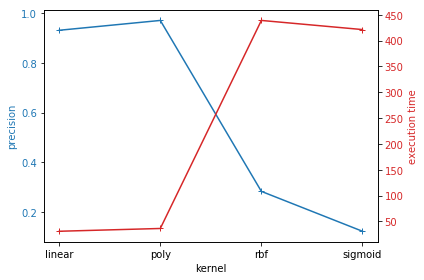

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('kernel')
ax1.set_ylabel('precision', color=color)
ax1.plot(["linear", "poly", "rbf", "sigmoid"],precisions_kernel,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot(["linear", "poly", "rbf", "sigmoid"],temps_kernel,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

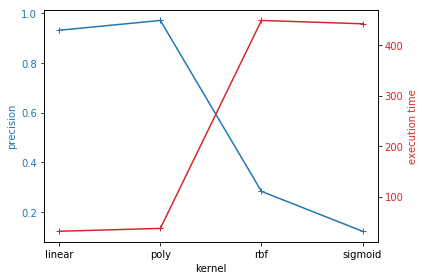

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('kernel')
ax1.set_ylabel('precision', color=color)
ax1.plot(["linear", "poly", "rbf", "sigmoid"],precisions_kernel,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot(["linear", "poly", "rbf", "sigmoid"],tt_kernel,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

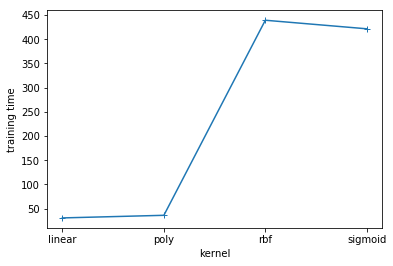

In [14]:
plt.plot(["linear", "poly", "rbf", "sigmoid"],temps_kernel,'+-')
plt.ylabel('training time')
plt.xlabel('kernel')
plt.show()

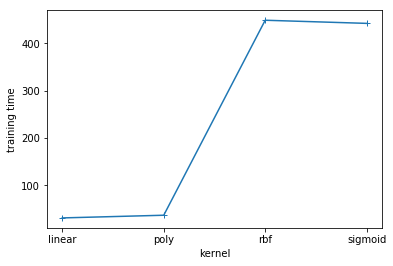

In [15]:
plt.plot(["linear", "poly", "rbf", "sigmoid"],tt_kernel,'+-')
plt.ylabel('training time')
plt.xlabel('kernel')
plt.show()

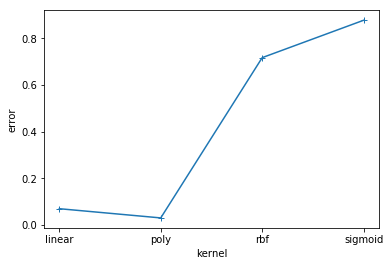

In [16]:
plt.plot(["linear", "poly", "rbf", "sigmoid"],erreur_kernel,'+-')
plt.ylabel('error')
plt.xlabel('kernel')
plt.show()

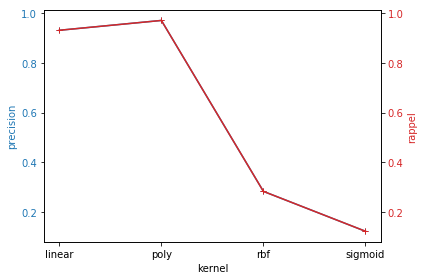

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('kernel')
ax1.set_ylabel('precision', color=color)
ax1.plot(["linear", "poly", "rbf", "sigmoid"],precisions_kernel,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot(["linear", "poly", "rbf", "sigmoid"],rappel_kernel,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [19]:
precisions_c = []
rappel_c = []
temps_c = []
tt_c = []
erreur_c = []
train_precisions_c = []
train_erreur_c = []
for tol in [0.1, 0.3, 0.5, 0.7, 1]:
    clsvm = SVC(C=tol,kernel='poly')
    st = time.time()
    start_time = time.process_time()
    clsvm.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()-st
    testpred = clsvm.predict(datatest)
    trainpred = clsvm.predict(datatrain)
    prec = clsvm.score(datatest,targettest)
    train_prec = clsvm.score(datatrain,targettrain)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    train_err = zero_one_loss(targettrain,trainpred)
    precisions_c.append(prec)
    train_precisions_c.append(train_prec)
    rappel_c.append(rap)
    temps_c.append(elapsed)
    tt_c.append(duration)
    erreur_c.append(err)
    train_erreur_c.append(train_err)
    print("precision =",prec,"precision apprentissage =",train_prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"time =",duration,"tolérance aux erreurs =",tol)
    cm = confusion_matrix(targettest,testpred)
    print(cm)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.9701666666666666 precision apprentissage = 1.0 rappel = 0.9701666666666666 erreur = 0.02983333333333338 temps = 48.625 time = 61.91967010498047 tolérance aux erreurs = 0.1
[[577   0   1   0   0   4   3   1   1   0]
 [  0 728   1   1   3   0   1   1   1   0]
 [  2   5 602   6   1   0   0   3   1   0]
 [  0   3   2 581   1   2   0   6   2   1]
 [  3   0   3   0 553   0   0   0   2   9]
 [  1   0   0   5   1 513   6   0   3   3]
 [  5   2   2   0   0   2 552   0   1   0]
 [  0   3   4   2   4   0   0 623   1   2]
 [  4   3   4   8   5   4   3   1 530   2]
 [  1   4   1   4   9   4   0   3   2 562]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.9701666666666666 precision apprentissage = 1.0 rappel = 0.9701666666666666 erreur = 0.02983333333333338 temps = 59.484375 time = 78.20689916610718 tolérance aux erreurs = 0.3
[[577   0   1   0   0   4   3   1   1   0]
 [  0 728   1   1   3   0   1   1   1   0]
 [  2   5 602   6   1   0   0   3   1   0]
 [  0   3   2 581   1   2   0   6   2   1]
 [  3   0   3   0 553   0   0   0   2   9]
 [  1   0   0   5   1 513   6   0   3   3]
 [  5   2   2   0   0   2 552   0   1   0]
 [  0   3   4   2   4   0   0 623   1   2]
 [  4   3   4   8   5   4   3   1 530   2]
 [  1   4   1   4   9   4   0   3   2 562]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.9701666666666666 precision apprentissage = 1.0 rappel = 0.9701666666666666 erreur = 0.02983333333333338 temps = 44.546875 time = 44.84582018852234 tolérance aux erreurs = 0.5
[[577   0   1   0   0   4   3   1   1   0]
 [  0 728   1   1   3   0   1   1   1   0]
 [  2   5 602   6   1   0   0   3   1   0]
 [  0   3   2 581   1   2   0   6   2   1]
 [  3   0   3   0 553   0   0   0   2   9]
 [  1   0   0   5   1 513   6   0   3   3]
 [  5   2   2   0   0   2 552   0   1   0]
 [  0   3   4   2   4   0   0 623   1   2]
 [  4   3   4   8   5   4   3   1 530   2]
 [  1   4   1   4   9   4   0   3   2 562]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.9701666666666666 precision apprentissage = 1.0 rappel = 0.9701666666666666 erreur = 0.02983333333333338 temps = 46.546875 time = 47.778717041015625 tolérance aux erreurs = 0.7
[[577   0   1   0   0   4   3   1   1   0]
 [  0 728   1   1   3   0   1   1   1   0]
 [  2   5 602   6   1   0   0   3   1   0]
 [  0   3   2 581   1   2   0   6   2   1]
 [  3   0   3   0 553   0   0   0   2   9]
 [  1   0   0   5   1 513   6   0   3   3]
 [  5   2   2   0   0   2 552   0   1   0]
 [  0   3   4   2   4   0   0 623   1   2]
 [  4   3   4   8   5   4   3   1 530   2]
 [  1   4   1   4   9   4   0   3   2 562]]


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision = 0.9701666666666666 precision apprentissage = 1.0 rappel = 0.9701666666666666 erreur = 0.02983333333333338 temps = 43.59375 time = 44.33083510398865 tolérance aux erreurs = 1
[[577   0   1   0   0   4   3   1   1   0]
 [  0 728   1   1   3   0   1   1   1   0]
 [  2   5 602   6   1   0   0   3   1   0]
 [  0   3   2 581   1   2   0   6   2   1]
 [  3   0   3   0 553   0   0   0   2   9]
 [  1   0   0   5   1 513   6   0   3   3]
 [  5   2   2   0   0   2 552   0   1   0]
 [  0   3   4   2   4   0   0 623   1   2]
 [  4   3   4   8   5   4   3   1 530   2]
 [  1   4   1   4   9   4   0   3   2 562]]


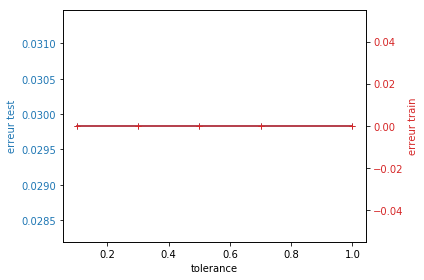

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('erreur test', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],erreur_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('erreur train', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],train_erreur_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

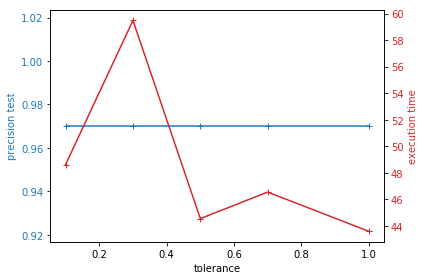

In [21]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('precision test', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],precisions_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],temps_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

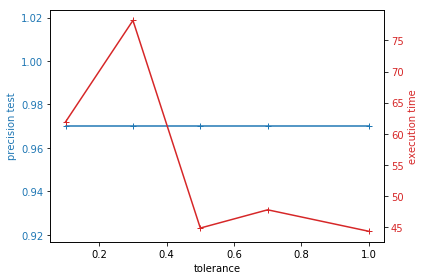

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('precision test', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],precisions_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],tt_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

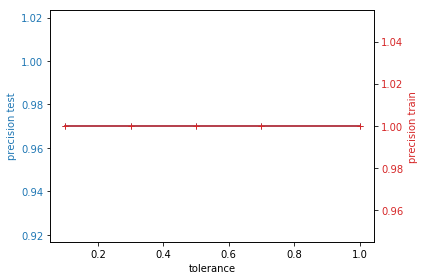

In [23]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('precision test', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],precisions_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('precision train', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],train_precisions_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

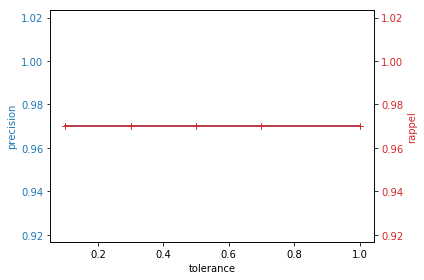

In [24]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tolerance')
ax1.set_ylabel('precision', color=color)
ax1.plot([0.1, 0.3, 0.5, 0.7, 1],precisions_c,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot([0.1, 0.3, 0.5, 0.7, 1],rappel_c,'+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

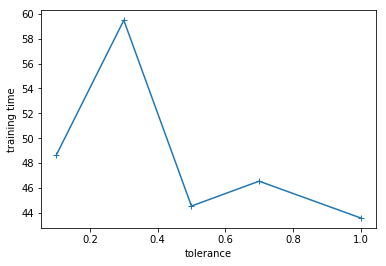

In [25]:
plt.plot([0.1, 0.3, 0.5, 0.7, 1],temps_c,'+-')
plt.ylabel('training time')
plt.xlabel('tolerance')
plt.show()

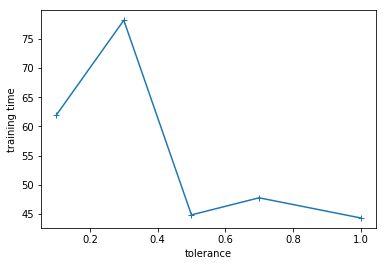

In [26]:
plt.plot([0.1, 0.3, 0.5, 0.7, 1],tt_c,'+-')
plt.ylabel('training time')
plt.xlabel('tolerance')
plt.show()

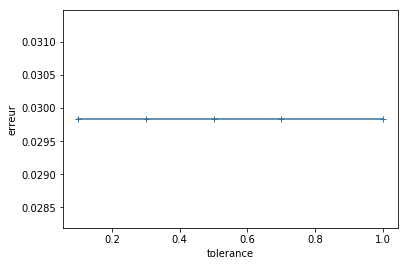

In [27]:
plt.plot([0.1, 0.3, 0.5, 0.7, 1],erreur_c,'+-')
plt.ylabel('erreur')
plt.xlabel('tolerance')
plt.show()

In [28]:
precisions_c = []
rappel_c = []
temps_c = []
tt_c = []
erreur_c = []
train_precisions_c = []
train_erreur_c = []
for tol in [0.1, 0.3, 0.5, 0.7, 1]:
    clsvm = SVC(C=tol,kernel='linear')
    st = time.time()
    start_time = time.process_time()
    clsvm.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()-st
    testpred = clsvm.predict(datatest)
    trainpred = clsvm.predict(datatrain)
    prec = clsvm.score(datatest,targettest)
    train_prec = clsvm.score(datatrain,targettrain)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    train_err = zero_one_loss(targettrain,trainpred)
    precisions_c.append(prec)
    train_precisions_c.append(train_prec)
    rappel_c.append(rap)
    temps_c.append(elapsed)
    tt_c.append(duration)
    erreur_c.append(err)
    train_erreur_c.append(train_err)
    print("precision =",prec,"precision apprentissage =",train_prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"time =",duration,"tolérance aux erreurs =",tol)
    cm = confusion_matrix(targettest,testpred)
    print(cm)

precision = 0.9306666666666666 precision apprentissage = 1.0 rappel = 0.9306666666666666 erreur = 0.06933333333333336 temps = 55.953125 time = 86.4502763748169 tolérance aux erreurs = 0.1
[[571   0   5   1   0   6   2   1   1   0]
 [  0 719   0   6   2   1   1   0   6   1]
 [  5   6 582   6   1   1   5   6   8   0]
 [  1   4   5 557   2  12   2   6   9   0]
 [  2   1   5   1 539   0   3   5   2  12]
 [  3   3   3  30   3 473   8   2   5   2]
 [  4   0   8   0   1  10 541   0   0   0]
 [  0   5  11   6   4   0   1 599   0  13]
 [  6  19  11  18   5  17   1   4 479   4]
 [  2   3   1  10  25   5   0  20   0 524]]
precision = 0.9306666666666666 precision apprentissage = 1.0 rappel = 0.9306666666666666 erreur = 0.06933333333333336 temps = 37.453125 time = 38.157492876052856 tolérance aux erreurs = 0.3
[[571   0   5   1   0   6   2   1   1   0]
 [  0 719   0   6   2   1   1   0   6   1]
 [  5   6 582   6   1   1   5   6   8   0]
 [  1   4   5 557   2  12   2   6   9   0]
 [  2   1   5   1 5